# README

* Marchetti Data Subset:
    * Paper: https://arxiv.org/abs/1804.10607 (go to pdf for link to data)
    * Subset of stars with radial velocity measurements in the GAIA DR2
    * About 7.2 million stars selected
    * Stars in Galactocentric Frame Assuming:
        * distance between the Sun and the GC :    $d= 8.2 kpc$
        * Sun's height above the stellar disk:     $z= 25 pc$
        * rotation velocity at the Sun position:   $v_{LSR}= 238 km/s$
        * Sun's orbital velocity vector:        $(U, V, W)= (14.0, 12.24, 7.25) km/s$
    * Coordinate System:
        * X-direction pointing in the direction of the GC (from the Sun's location)
        * Y-direction along Galactic rotation
        * Z-direction pointing towards Galactic North-Pole
        
        
* Purpose of this Notebook:
    * Reading in the Marchetti Subset and create plots of U x V for local stars
    

* Packages needed:
    * astropy: http://www.astropy.org/
    * numpy: http://www.numpy.org/
    * matplotlib: https://matplotlib.org/
    

* Constants Assumed in this code:
    * $X_{sun} = -8 kpc$
    * $Y_{sun} = 0$
    * $Z_{sun} = 25 pc$

# Importing the FITS data and reading it

In [29]:
# Importing Table and numpy for manipulation of data.
from astropy.table import Table  
import numpy as np

# Reading the table. The part in quotes is the precise
# location of the file.
data_table = Table.read('C:/Users/dougl/Desktop/Marchetti data/data.fits', format = 'fits') 

# printing the header of each column
print(data_table[1].columns)

<TableColumns names=('source_id','ra','dec','parallax','e_parallax','pmra','e_pmra','pmdec','e_pmdec','vrad','e_vrad','GMag','dist','el_dist','eu_dist','rGC','el_rGC','eu_rGC','RGC','el_RGC','eu_RGC','xGC','el_xGC','eu_xGC','yGC','el_yGC','eu_yGC','zGC','el_zGC','eu_zGC','U','el_U','eu_U','V','el_V','eu_V','W','el_W','eu_W','UW','el_UW','eu_UW','vR','el_vR','eu_vR','vtot','el_vtot','eu_vtot','P_ub')>


# Creating Variables

In [30]:
# Creating numpy arrays of important variables
# Centering Coordinates on Sun's location.

U = np.array(data_table["U"])
V = np.array(data_table["V"])
W = np.array(data_table["W"])     
X = np.array(data_table["xGC"])+8000             
Y = np.array(data_table["yGC"])
Z = np.array(data_table["zGC"])-25

In [13]:
#Range of dataset
rng = len(U)

# Selecting Stars in a radius of 100pc around Sun

In [19]:
#Creating cylindrical coordinate R
R = X**2 + Y**2

#Selecting stars around 100 pc of Sun
ichoose = np.where((R < 10000))

#Creating empty arrays and filling them with zeros.
Close_X = np.zeros(len(ichoose[0])-1)
Close_Y = np.zeros(len(ichoose[0])-1)      
Close_Z = np.zeros(len(ichoose[0])-1)      
Close_U = np.zeros(len(ichoose[0])-1)
Close_V = np.zeros(len(ichoose[0])-1)
Close_W = np.zeros(len(ichoose[0])-1)

#Adding the selected stars to the arrays and 
#converting to Galactocentric coord and kpc.
for i in range(0,len(ichoose[0])-1):
    Close_X[i] = X[ichoose[0][i]]*0.001 - 8
    Close_Y[i] = Y[ichoose[0][i]]*0.001
    Close_Z[i] = (Z[ichoose[0][i]]+25)*0.001
    Close_U[i] = U[ichoose[0][i]]
    Close_V[i] = V[ichoose[0][i]]
    Close_W[i] = W[ichoose[0][i]]

#Printing as sanity check
print(Close_X)

[-8.06227056 -8.05686669 -8.0592136  ... -7.99368588 -7.94776409
 -7.99590839]


# Scatter Plot: U x V

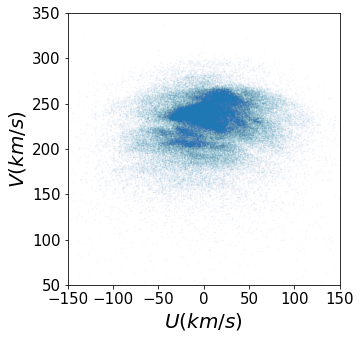

In [20]:
# importing matplotlib
import matplotlib.pyplot as plt  

#Defining size of plot
plt.figure(figsize=(5,5))

#Creating the scatter plot with appropriate size of
#dot (s) and opacity level (alpha)
plt.scatter(Close_U, Close_V, s=0.17, alpha=0.05)

#Setting x y limits.
plt.xlim(-150,150)
plt.ylim(50,350)

#Labelling axes and increasing tick size.
plt.xlabel("$U(km/s)$", fontsize=20)
plt.ylabel("$V(km/s)$", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Equalling space in between ticks
plt.gca().set_aspect("equal",adjustable="box")

# 2-D Histogram:  U x V

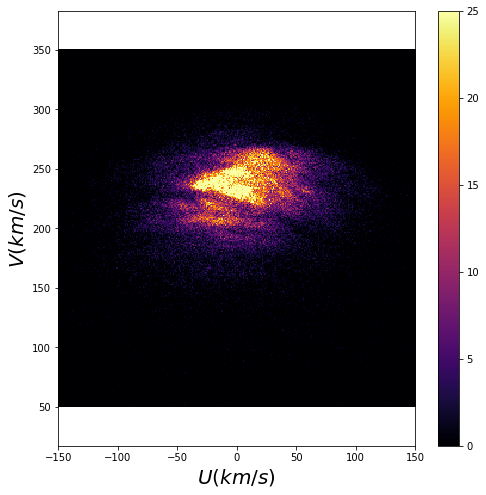

In [21]:
#Labeling axes.
plt.figure(figsize=(8,8))
plt.xlabel("$U(km/s)$", fontsize=20)
plt.ylabel("$V(km/s)$", fontsize=20)

#Equivalent to equalling spacing of ticks in previous cell
plt.axis('equal')

#Creating the 2-d histogram using the plt function.
#Using 300 by 300 bins in selected range.
plt.hist2d(Close_U, Close_V, (300, 300),range=[[-150,150],[50,350]], cmap='inferno',
           vmin=0,vmax=25)

#Plots the colorbar with my selected vmin and vmax#
plt.colorbar()

# 2-D Log Histogram:  U x V

C:\Users\dougl\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


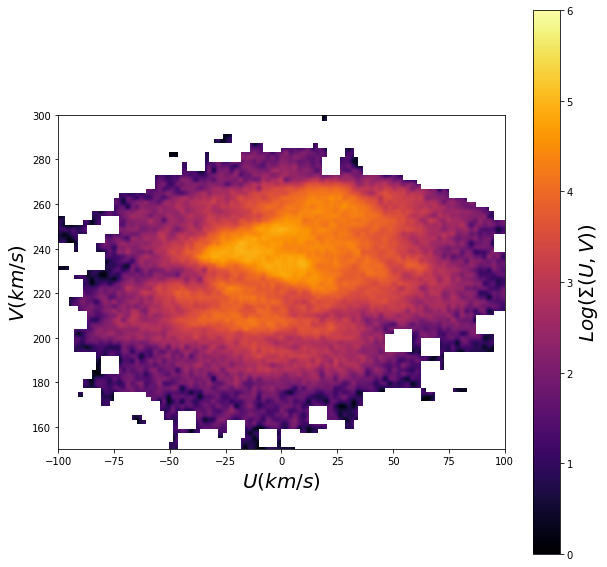

In [22]:
#Using the numpy 2d hist function. Naming it H in order to
#take the log of it later.
H = np.histogram2d(Close_U,Close_V,bins=(np.arange(-100,100,step=2),np.arange(150,300,step=2)))

#Setting figure size again.
plt.figure(figsize=(10,10))


#Plotting the log of the hist.
#Taking the transpose because numpy histogram flips image.
#cmaps availabe at https://matplotlib.org/examples/color/colormaps_reference.html
E = plt.imshow(np.log(H[0]).T,extent=[-100,100,150,300],origin='lower',cmap='inferno',interpolation='gaussian',
          vmin=0,vmax=6, aspect='equal')


#Setting my labels again
plt.xlabel("$U(km/s)$", fontsize=20)    
plt.ylabel("$V(km/s)$", fontsize=20)

#Making the colorbar. Naming it in order to label it.
C = plt.colorbar(E)

#Setting the label
C.set_label('$Log(\Sigma(U,V))$',size=20)

# 'Spiral' Plot: Z x W colored by Vphi

C:\Users\dougl\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dougl\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


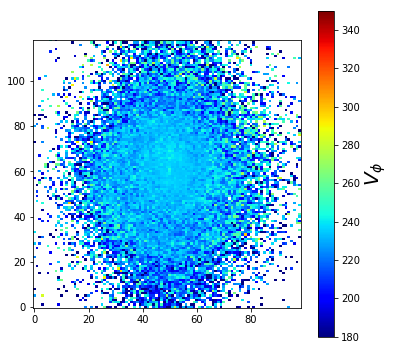

In [28]:
##############################################################################
# Calculating V_phi
Close_Vphi = (Close_X*Close_V - Close_Y*Close_U)/((Close_X**2+Close_Y**2)**0.5)
##############################################################################
# Creating bins and 2d Hist for xed and yed.
bin_x = np.arange(-1,1, step=0.02)   ## 100
bin_y = np.arange(-60,60, step=1)    ## 120
H, xed, yed = np.histogram2d(Close_Z, Close_W, bins=(bin_x,bin_y))

##############################################################################
# Creating my empty 2-D array that will be my color function
mean_Vphi = np.ndarray(shape=(len(yed)-1,len(xed)-1))

##############################################################################
# Loop to index each point; calculate its mean Vphi and set it to array
for i in range(0, len(bin_x)-1):
    for j in range(0, len(bin_y)-1):
        ichoose = np.where( (Close_Z>bin_x[i]) & (Close_Z<bin_x[i+1]) 
                           & (Close_W>bin_y[j]) & (Close_W< bin_y[j+1]))
        
        ####################################################
        # np matrices do rows first and columns second. Thats why its [j,i]
        mean_Vphi[j,i] = np.abs(np.median(Close_Vphi[ichoose]))

##############################################################################
# Setting figure size and plotting mean_Vphi with colorbar. Selected v-values 
# for ease of seing spiral. Actual range between 180 and 250.
plt.figure(figsize=(6,6))
T = plt.imshow(mean_Vphi, cmap = 'jet',origin='lower', vmin=180,vmax=350)
cbar = plt.colorbar(T)

##############################################################################
# Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
plt.gca().set_aspect(aspect='0.833333333333333',adjustable='box')
cbar.set_label('$V_{\phi}$',size=20)